<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [957]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

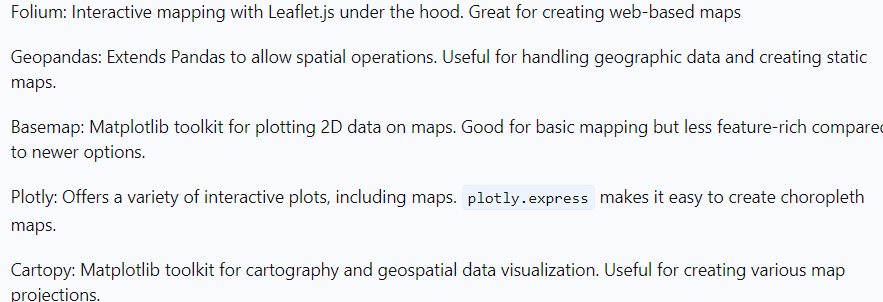

## Dataset Loading

In [958]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [959]:
'''df_1 = pd.read_csv('belga_0711.csv')
df_1['bus_dispatched'] = 3;
df_2 = pd.read_csv('deocareza_0711.csv')
df_2['bus_dispatched'] = 1
df_3 = pd.read_csv('graceda_0711.csv')
df_3['bus_dispatched'] = 2;
df_4 = pd.read_csv('manuel_0711.csv')
df_4['bus_dispatched'] = 4;
df_5 = pd.read_csv(Paralde_0711_url)
df_5['bus_dispatched'] = 5;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('belga_0711.csv')\ndf_1['bus_dispatched'] = 3;\ndf_2 = pd.read_csv('deocareza_0711.csv')\ndf_2['bus_dispatched'] = 1\ndf_3 = pd.read_csv('graceda_0711.csv')\ndf_3['bus_dispatched'] = 2;\ndf_4 = pd.read_csv('manuel_0711.csv')\ndf_4['bus_dispatched'] = 4;\ndf_5 = pd.read_csv(Paralde_0711_url)\ndf_5['bus_dispatched'] = 5;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [960]:
df = pd.read_csv(Ostan_0712_url)

In [961]:
df.sample(10)

,id,driver,datePH,longitude,latitude,altitude,gpsSpeed,timeStamp,calEngineLoad,vehSpeed,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
6130,64ade4f4f2904a7f285e630a,Ranny Ostan,20230712,121.029283,14.550595,25,0,2023-07-11T23:25:37.000+0000,6,10,...,61.7,2.42,7.0,25.0,37.0,10937.0,1.0,2.0,40.0,0.0
12135,64ae07aebb0a62299869f1a6,Ranny Ostan,20230712,121.033052,14.651092,62,0,2023-07-12T01:53:48.000+0000,53,1,...,86.3,3.78,9.0,53.0,48.0,18770.0,1.0,2.0,50.0,0.0
43741,64aec8014237c45e09327cab,Ranny Ostan,20230712,121.046887,14.628403,31,0,2023-07-12T15:34:00.000+0000,57,0,...,81.1,11.34,23.0,34.0,0.0,53145.0,1.0,2.0,125.0,0.0
40108,64aeb6474237c45e09326ac2,Ranny Ostan,20230712,120.987177,14.657320,25,0,2023-07-12T14:18:30.000+0000,40,0,...,64.1,11.81,22.0,18.0,30.0,50694.0,1.0,2.0,97.0,0.0
6873,64ade8ae3957930b30144035,Ranny Ostan,20230712,120.994225,14.537517,8,0,2023-07-11T23:41:22.000+0000,36,0,...,49.9,4.21,7.0,41.0,22.0,11746.0,1.0,2.0,55.0,0.0
30813,64ae82411db63c24bcc97234,Ranny Ostan,20230712,120.990383,14.513570,8,0,2023-07-12T10:36:40.000+0000,37,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23737,64ae5ccee12c3b74c94f3d6c,Ranny Ostan,20230712,120.990052,14.657375,21,27,2023-07-12T07:56:38.000+0000,8,29,...,65.0,2.10,15.0,56.0,38.0,32934.0,1.0,2.0,86.0,0.0
23579,64ae5bfbe12c3b74c94f39c4,Ranny Ostan,20230712,121.000872,14.657433,6,27,2023-07-12T07:53:26.000+0000,13,26,...,63.1,11.30,15.0,53.0,26.0,32734.0,1.0,2.0,91.0,0.0
6019,64ade478f2904a7f285e5fe3,Ranny Ostan,20230712,121.031618,14.552323,13,42,2023-07-11T23:23:19.000+0000,31,46,...,71.4,1.37,7.0,23.0,19.0,10799.0,1.0,2.0,40.0,0.0
31177,64ae84401db63c24bcc97bb3,Ranny Ostan,20230712,120.990422,14.513535,15,0,2023-07-12T10:45:09.000+0000,33,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [962]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46726 entries, 0 to 46725
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   46726 non-null  object 
 1   driver               46726 non-null  object 
 2   datePH               46726 non-null  int64  
 3   longitude            46726 non-null  float64
 4   latitude             46726 non-null  float64
 5   altitude             46726 non-null  int64  
 6   gpsSpeed             46726 non-null  int64  
 7   timeStamp            46726 non-null  object 
 8   calEngineLoad        46726 non-null  int64  
 9   vehSpeed             46726 non-null  int64  
 10  throttlePosition     46726 non-null  int64  
 11  ambientAirTemp       46726 non-null  int64  
 12  engineOilTemp        46726 non-null  int64  
 13  Speed                46726 non-null  int64  
 14  fuelPressure         46726 non-null  int64  
 15  engineRPM            46726 non-null 

In [963]:
df.describe()

,datePH,longitude,latitude,altitude,gpsSpeed,calEngineLoad,vehSpeed,throttlePosition,ambientAirTemp,engineOilTemp,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
count,4.672600e+04,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,...,39214.000000,39214.000000,39214.000000,39214.000000,39214.000000,39214.000000,39214.000000,39214.000000,39214.000000,39214.000000
mean,2.023071e+07,121.015072,14.583971,28.195908,10.274216,37.383577,11.941039,15.883106,28.638638,91.116680,...,67.353591,4.186087,13.284184,29.474958,29.701025,27982.072092,1.014077,1.977840,67.521574,0.002423
std,1.891380e-01,0.024875,0.054210,31.631403,15.934829,22.375396,16.656601,28.270777,2.008816,3.922873,...,16.092807,5.124304,6.214390,17.318508,17.207217,15684.672483,0.117808,0.147207,31.067565,0.148846
min,2.023071e+07,120.983408,14.507497,-347.000000,0.000000,0.000000,0.000000,0.000000,25.000000,84.000000,...,6.200000,0.870000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,-31.000000,-1.000000
25%,2.023071e+07,120.990763,14.537348,11.000000,0.000000,23.000000,0.000000,0.000000,27.000000,88.000000,...,51.400000,1.630000,8.000000,14.000000,15.000000,14813.250000,1.000000,2.000000,45.000000,0.000000
50%,2.023071e+07,121.008793,14.567752,24.000000,0.000000,37.000000,2.000000,0.000000,28.000000,90.000000,...,65.200000,2.120000,14.000000,30.000000,30.000000,28052.500000,1.000000,2.000000,66.000000,0.000000
75%,2.023071e+07,121.036854,14.650910,41.000000,17.000000,47.000000,23.000000,24.000000,30.000000,94.000000,...,81.300000,3.680000,19.000000,44.000000,45.000000,41647.750000,1.000000,2.000000,95.000000,0.000000
max,2.023071e+07,121.060843,14.657937,848.000000,72.000000,100.000000,72.000000,100.000000,35.000000,100.000000,...,215.100000,267.120000,23.000000,59.000000,59.000000,54751.000000,2.000000,2.000000,128.000000,1.000000


In [964]:
df.isnull().sum()

,0
id,0
driver,0
datePH,0
longitude,0
latitude,0
altitude,0
gpsSpeed,0
timeStamp,0
calEngineLoad,0
vehSpeed,0


In [965]:
df.duplicated().sum()

0

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46726 entries, 0 to 46725
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   46726 non-null  object 
 1   driver               46726 non-null  object 
 2   datePH               46726 non-null  int64  
 3   longitude            46726 non-null  float64
 4   latitude             46726 non-null  float64
 5   altitude             46726 non-null  int64  
 6   gpsSpeed             46726 non-null  int64  
 7   timeStamp            46726 non-null  object 
 8   calEngineLoad        46726 non-null  int64  
 9   vehSpeed             46726 non-null  int64  
 10  throttlePosition     46726 non-null  int64  
 11  ambientAirTemp       46726 non-null  int64  
 12  engineOilTemp        46726 non-null  int64  
 13  Speed                46726 non-null  int64  
 14  fuelPressure         46726 non-null  int64  
 15  engineRPM            46726 non-null 

In [967]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())

id
['64adc397aa02645d2a008550' '64adc397aa02645d2a00854f'
 '64adc397aa02645d2a00854e' ... '64aed7bd4062ec6f57fc356f'
 '64aed7bd4062ec6f57fc356e' '64aed7bd4062ec6f57fc356d']
driver
['Ranny Ostan']
datePH
[20230712 20230713]
longitude
[120.9905233 120.9905416 120.9905683 ... 120.9920166 120.991905
 120.9919016]
latitude
[14.5155183 14.5156483 14.5158933 ... 14.5115216 14.51147   14.5114983]
altitude
[  -9   -8   -7  -10   -6   -5   -4   -3   -1   19   18   20   21   22
   23   24   25   26   27   28   29   30   31   32   33   34   36   37
   38   35   47   53   57   58   59   60   61   56   54   52   51   49
   46   45   44   43   41   40   39   16   13   14   15   17   12    0
   48   55   62   65   66   70   71   73   75   69   63   50   42   64
   72   74   68   67   76   79   85   86   87   88   89   84   82   80
   77   78   81    4    5    6    7    8    9   10   11 -303 -347 -150
 -202 -203 -130 -108  -94  -67  -58   -2    1    2    3  -11   83   90
   91   92   93   94   98   99 

In [968]:
#cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched']
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [969]:
'''df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)'''

"df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',\n                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',\n                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',\n                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',\n                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',\n                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',\n                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)"

In [970]:
df = df[cols]

In [971]:
df[(df['Alight'] == True) & (df['Board'] == True)]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec


In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46726 entries, 0 to 46725
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  46726 non-null  float64
 1   latitude   46726 non-null  float64
 2   timestamp  46726 non-null  object 
 3   Board      39214 non-null  object 
 4   Alight     39214 non-null  object 
 5   Numpass    39214 non-null  float64
 6   Hour       39214 non-null  float64
 7   Min        39214 non-null  float64
 8   Sec        39214 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.2+ MB


In [973]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [974]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [975]:
df.isna().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Time,0


In [976]:
df.duplicated().sum()

166

In [977]:
df.dropna(inplace = True)

In [978]:
df.drop_duplicates(inplace = True)

In [979]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [980]:
df[df['Board']==True]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Time,datePH,Day_of_week,stop_cluster
218,120.990025,14.528677,2023-07-12 05:07:26,True,False,18.0,5,7,26,05:07:26,2023-07-12,2,11
561,120.992130,14.536653,2023-07-12 05:15:33,True,False,18.0,5,15,33,05:15:33,2023-07-12,2,15
563,120.992130,14.536653,2023-07-12 05:15:34,True,False,19.0,5,15,34,05:15:34,2023-07-12,2,15
565,120.992130,14.536653,2023-07-12 05:15:35,True,False,20.0,5,15,35,05:15:35,2023-07-12,2,15
568,120.992130,14.536653,2023-07-12 05:15:37,True,False,21.0,5,15,37,05:15:37,2023-07-12,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44632,121.056293,14.586825,2023-07-12 23:52:42,True,False,29.0,23,52,42,23:52:42,2023-07-12,2,7
44634,121.056293,14.586825,2023-07-12 23:52:43,True,False,31.0,23,52,43,23:52:43,2023-07-12,2,7
45854,121.004488,14.538137,2023-07-13 00:18:29,True,False,30.0,0,18,29,00:18:29,2023-07-13,3,0
46274,120.989123,14.533863,2023-07-13 00:27:03,True,False,4.0,0,27,3,00:27:03,2023-07-13,3,12


In [981]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46560 entries, 0 to 46725
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     46560 non-null  float64       
 1   latitude      46560 non-null  float64       
 2   timestamp     46560 non-null  datetime64[ns]
 3   Board         46560 non-null  int64         
 4   Alight        46560 non-null  int64         
 5   Numpass       46560 non-null  float64       
 6   Hour          46560 non-null  int32         
 7   Min           46560 non-null  int32         
 8   Sec           46560 non-null  int32         
 9   Time          46560 non-null  object        
 10  datePH        46560 non-null  object        
 11  Day_of_week   46560 non-null  int32         
 12  stop_cluster  46560 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(2), object(2)
memory usage: 4.1+ MB


In [983]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [984]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46560 entries, 0 to 46725
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     46560 non-null  float64       
 1   latitude      46560 non-null  float64       
 2   timestamp     46560 non-null  datetime64[ns]
 3   Board         46560 non-null  int64         
 4   Alight        46560 non-null  int64         
 5   Numpass       46560 non-null  float64       
 6   Hour          46560 non-null  int32         
 7   Min           46560 non-null  int32         
 8   Sec           46560 non-null  int32         
 9   Day_of_week   46560 non-null  int32         
 10  stop_cluster  46560 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(2)
memory usage: 3.4 MB


In [985]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [986]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [121.00013099  14.5376956 ]
Cluster 1: [121.03906694  14.64186917]
Cluster 2: [121.04573049  14.56789716]
Cluster 3: [121.00045999  14.65733465]
Cluster 4: [120.99074923  14.51219704]
Cluster 5: [121.053657    14.61384919]
Cluster 6: [121.02842314  14.54967071]
Cluster 7: [121.05629612  14.5866179 ]
Cluster 8: [120.98677457  14.65718735]
Cluster 9: [121.01616837  14.65761283]
Cluster 10: [121.04768219  14.62686417]
Cluster 11: [120.99046769  14.52379901]
Cluster 12: [120.98756993  14.53416323]
Cluster 13: [121.03319324  14.6509503 ]
Cluster 14: [121.01097646  14.53917736]
Cluster 15: [120.99164195  14.53687775]
Cluster 16: [121.05872242  14.60075987]
Cluster 17: [121.03586132  14.55571727]
Cluster 18: [121.04306463  14.63553124]
Cluster 19: [121.05063948  14.57697399]
Cluster 20: [121.0259602   14.65649069]


In [987]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [988]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster
0,120.990523,14.515518,2023-07-12 05:02:53,0,0,17.0,5,2,53,2,4
1,120.990542,14.515648,2023-07-12 05:02:54,0,0,17.0,5,2,54,2,4
2,120.990542,14.515648,2023-07-12 05:02:55,0,0,17.0,5,2,55,2,4
3,120.990568,14.515893,2023-07-12 05:02:56,0,0,17.0,5,2,56,2,4
4,120.990580,14.516008,2023-07-12 05:02:57,0,0,17.0,5,2,57,2,4


In [989]:
# Define the coordinates for the end clusters (example values)
northmost_coords = (14.65720874, 120.98751702)  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = (14.51075543, 120.99064908)  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_cluster_0'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], cluster_0_coords[0], cluster_0_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_cluster_18'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], cluster_18_coords[0], cluster_18_coords[1]), axis=1)

    return df

In [990]:
df = calculate_distance_from_terminals(df)

In [991]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_cluster_0' and 'distance_from_cluster_18' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_cluster_0'] = df['distance_from_cluster_0'].diff()
    df['dist_change_cluster_18'] = df['distance_from_cluster_18'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_cluster_0'] < 0 else 'Southbound' if row['dist_change_cluster_18'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()

    return df

In [992]:
df = determine_direction_based_on_terminals(df)
df

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction
0,120.990523,14.515518,2023-07-12 05:02:53,0,0,17.0,5,2,53,2,4,15.758579,0.529780,NaN,NaN,None
1,120.990542,14.515648,2023-07-12 05:02:54,0,0,17.0,5,2,54,2,4,15.744167,0.544185,-0.014412,0.014405,Northbound
2,120.990542,14.515648,2023-07-12 05:02:55,0,0,17.0,5,2,55,2,4,15.744167,0.544185,0.000000,0.000000,Northbound
3,120.990568,14.515893,2023-07-12 05:02:56,0,0,17.0,5,2,56,2,4,15.716990,0.571371,-0.027177,0.027186,Northbound
4,120.990580,14.516008,2023-07-12 05:02:57,0,0,17.0,5,2,57,2,4,15.704232,0.584140,-0.012758,0.012769,Northbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46721,120.991863,14.511470,2023-07-13 00:40:48,0,0,0.0,0,40,48,3,4,16.212157,0.152964,0.000000,0.000000,Southbound
46722,120.991863,14.511470,2023-07-13 00:40:49,0,0,0.0,0,40,49,3,4,16.212157,0.152964,0.000000,0.000000,Southbound
46723,120.992080,14.511498,2023-07-13 00:40:59,0,0,0.0,0,40,59,3,4,16.209701,0.174786,-0.002456,0.021822,Northbound
46724,120.992087,14.511497,2023-07-13 00:41:00,0,0,0.0,0,41,0,3,4,16.209911,0.175324,0.000210,0.000538,Northbound


In [993]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [994]:
df = assign_quarter_hour(df)
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour
8911,120.989328,14.536302,2023-07-12 08:44:30,0,0,25.0,8,44,30,2,15,13.445673,2.844160,0.000000,0.000000,Northbound,7
8308,120.991385,14.511827,2023-07-12 08:14:11,0,0,0.0,8,14,11,2,4,16.171114,0.143048,-0.000565,0.000265,Northbound,2
2424,121.032028,14.653340,2023-07-12 06:09:47,0,0,49.0,6,9,47,2,13,4.807686,16.468140,0.000000,0.000000,Northbound,1
17632,120.992952,14.537203,2023-07-12 11:49:05,0,0,36.0,11,49,5,2,15,13.356804,2.951294,0.000000,0.000000,Southbound,8
1545,121.045943,14.568132,2023-07-12 05:42:40,0,0,29.0,5,42,40,2,2,11.731512,8.724928,0.000000,0.000000,Northbound,7
45720,121.005802,14.538317,2023-07-13 00:15:43,0,0,29.0,0,15,43,3,14,13.365811,3.471661,0.000000,0.000000,Northbound,3
3980,121.011197,14.657430,2023-07-12 06:40:57,0,0,46.0,6,40,57,2,9,2.547479,16.458675,0.000000,0.000000,Southbound,7
23362,121.014677,14.657640,2023-07-12 15:48:26,0,0,58.0,15,48,26,2,9,2.922118,16.536220,0.000000,0.000000,Southbound,8
42644,121.010698,14.657393,2023-07-12 23:11:10,0,0,22.0,23,11,10,2,9,2.493840,16.447511,0.011300,0.002030,Southbound,2
5401,121.059603,14.599833,2023-07-12 07:10:00,0,0,45.0,7,10,0,2,16,10.042652,12.376775,0.011236,-0.010219,Southbound,2


In [995]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by stop_cluster, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['stop_cluster', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [996]:
df = add_boarding_counts_per_cluster(df)

In [997]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (stop_cluster, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['stop_cluster']
        direction = row['direction']

        # Create a unique key based on stop_cluster and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (stop_cluster, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (stop_cluster, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [998]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [999]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
0,120.990523,14.515518,2023-07-12 05:02:53,0,0,17.0,5,2,53,2,4,15.758579,0.529780,NaN,NaN,None,0,0
1,120.990542,14.515648,2023-07-12 05:02:54,0,0,17.0,5,2,54,2,4,15.744167,0.544185,-0.014412,0.014405,Northbound,0,0
2,120.990542,14.515648,2023-07-12 05:02:55,0,0,17.0,5,2,55,2,4,15.744167,0.544185,0.000000,0.000000,Northbound,0,0
3,120.990568,14.515893,2023-07-12 05:02:56,0,0,17.0,5,2,56,2,4,15.716990,0.571371,-0.027177,0.027186,Northbound,0,0
4,120.990580,14.516008,2023-07-12 05:02:57,0,0,17.0,5,2,57,2,4,15.704232,0.584140,-0.012758,0.012769,Northbound,0,0


In [1000]:
df[df['Board'] == 1].sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
13802,120.987083,14.657115,2023-07-12 10:28:46,1,0,11.0,10,28,46,2,8,0.047808,16.278965,0.000000,0.000000,Northbound,4,0
3474,120.987173,14.657125,2023-07-12 06:30:59,1,0,24.0,6,30,59,2,8,0.038131,16.279851,-0.003622,-0.000265,Northbound,5,0
22930,121.032975,14.651562,2023-07-12 15:39:46,1,0,58.0,15,39,46,2,13,4.930415,16.306014,0.000000,0.000000,Northbound,6,0
43185,121.032893,14.650887,2023-07-12 23:23:01,1,0,25.0,23,23,1,2,13,4.931843,16.231496,0.000000,0.000000,Northbound,0,0
43992,121.053312,14.614355,2023-07-12 23:39:06,1,0,30.0,23,39,6,2,5,8.533074,13.348589,0.000000,0.000000,Northbound,6,0
32674,120.991672,14.511603,2023-07-12 19:30:08,1,0,13.0,19,30,8,2,4,16.196758,0.144929,0.000000,0.000000,Southbound,5,0
24647,121.005325,14.657387,2023-07-12 16:14:41,1,0,29.0,16,14,41,2,3,1.915807,16.380950,0.000000,0.000000,Northbound,2,0
32662,120.991672,14.511603,2023-07-12 19:29:57,1,0,4.0,19,29,57,2,4,16.196758,0.144929,0.000000,0.000000,Southbound,4,0
24165,120.987135,14.657195,2023-07-12 16:04:51,1,0,10.0,16,4,51,2,8,0.041125,16.287728,0.000000,0.000000,Northbound,0,0
4724,121.032653,14.650972,2023-07-12 06:56:17,1,0,48.0,6,56,17,2,13,4.904943,16.233359,0.010447,-0.001891,Southbound,10,0


In [1001]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
37795,121.048838,14.624465,2023-07-12 21:28:50,0,0,11.0,21,28,50,2,10,7.535224,14.109774,-0.003049,0.005649,Northbound,4,0
11528,121.053330,14.614802,2023-07-12 09:41:18,0,0,22.0,9,41,18,2,5,8.507084,13.392462,-0.016735,0.017651,Northbound,7,0
1432,121.044698,14.564003,2023-07-12 05:40:22,0,0,27.0,5,40,22,2,2,12.052680,8.300678,-0.016181,0.024493,Northbound,7,0
11193,121.059175,14.594800,2023-07-12 09:34:17,0,0,20.0,9,34,17,2,16,10.372952,11.905030,-0.012736,0.031475,Northbound,5,0
33687,120.991553,14.536787,2023-07-12 20:00:46,0,0,14.0,20,0,46,2,15,13.397373,2.896170,0.000000,0.000000,Northbound,0,0
32608,120.992000,14.511802,2023-07-12 19:27:23,0,0,0.0,19,27,23,2,4,16.175732,0.186227,0.001290,-0.001092,Southbound,4,0
40214,120.987177,14.657320,2023-07-12 22:20:40,0,0,13.0,22,20,40,2,8,0.038654,16.301520,0.000000,0.000000,Southbound,0,0
18375,120.989625,14.511632,2023-07-12 12:06:15,0,0,23.0,12,6,15,2,4,16.189029,0.147121,0.000000,0.000000,Southbound,1,0
29868,120.989668,14.529678,2023-07-12 18:12:15,0,0,38.0,18,12,15,2,12,14.182627,2.106774,0.000000,0.000000,Southbound,2,0
38797,121.034580,14.649422,2023-07-12 21:50:41,0,0,15.0,21,50,41,2,13,5.136462,16.127456,-0.000764,0.003309,Northbound,9,0


In [1002]:
df.to_csv('ostan_0712.csv', index=False)
# df.to_csv('summary_0711.csv', index=False)

In [1003]:
df[df['Numpass'] == 0]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
3085,120.986672,14.657303,2023-07-12 06:23:13,0,1,0.0,6,23,13,2,8,0.091553,16.301000,0.000000,0.000000,Southbound,0,0
3086,120.986672,14.657303,2023-07-12 06:23:13,0,0,0.0,6,23,13,2,8,0.091553,16.301000,0.000000,0.000000,Southbound,0,0
3087,120.986672,14.657303,2023-07-12 06:23:14,0,0,0.0,6,23,14,2,8,0.091553,16.301000,0.000000,0.000000,Southbound,0,0
3088,120.986672,14.657303,2023-07-12 06:23:15,0,0,0.0,6,23,15,2,8,0.091553,16.301000,0.000000,0.000000,Southbound,0,0
3089,120.986672,14.657303,2023-07-12 06:23:16,0,0,0.0,6,23,16,2,8,0.091553,16.301000,0.000000,0.000000,Southbound,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46721,120.991863,14.511470,2023-07-13 00:40:48,0,0,0.0,0,40,48,3,4,16.212157,0.152964,0.000000,0.000000,Southbound,7,0
46722,120.991863,14.511470,2023-07-13 00:40:49,0,0,0.0,0,40,49,3,4,16.212157,0.152964,0.000000,0.000000,Southbound,7,0
46723,120.992080,14.511498,2023-07-13 00:40:59,0,0,0.0,0,40,59,3,4,16.209701,0.174786,-0.002456,0.021822,Northbound,7,0
46724,120.992087,14.511497,2023-07-13 00:41:00,0,0,0.0,0,41,0,3,4,16.209911,0.175324,0.000210,0.000538,Northbound,7,0


In [1004]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
8,17
13,12
3,12
1,9
9,6


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [1005]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['stop_cluster'].value_counts()

df[df['Board'] == 1]['stop_cluster'].value_counts()

,count
stop_cluster,
8,58
9,44
10,40
7,39
1,39
13,39
5,35
3,35
0,33


In [1006]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [1007]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.61912478735632, 121.01598482528735]


In [1008]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [1009]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

In [1010]:
#Waiting Time
#Overcrowding (Heuristic)

In [1011]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [1012]:
df.corr()['waiting_passengers'].abs().sort_values(ascending=False)

,waiting_passengers
waiting_passengers,1.000000
timestamp,0.153730
Hour,0.129303
longitude,0.113988
Numpass,0.055621
distance_from_cluster_18,0.046413
direction,0.037148
Min,0.035471
Alight,0.031286
latitude,0.030508


## Model training

In [1013]:
df.dropna(inplace = True)

In [1014]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1015]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1016]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [1017]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.10470007733082436
XGBoost RMSE: 0.105035790617068
0.9630476513928752
0.9628102779388428


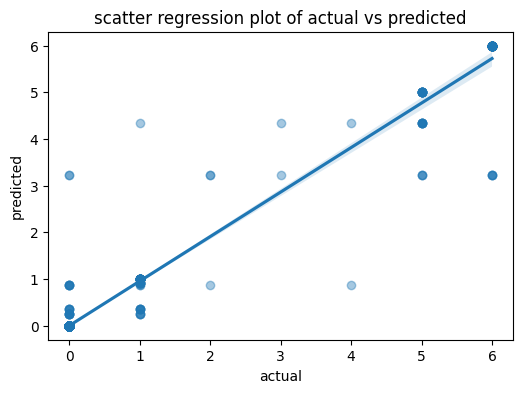

In [1018]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [1019]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15)]['stop_cluster'].value_counts()

,count
stop_cluster,


In [1020]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]

In [1021]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

4 0 1 [1.]
4 1 1 [1.]
4 2 1 [1.]
4 3 1 [1.]
4 4 1 [0.92504025]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [0.]
4 8 1 [0.]
4 9 1 [0.05]
4 10 1 [0.05]
4 11 1 [0.05]
4 12 1 [0.05]
4 13 1 [0.05]
4 14 1 [0.05]
4 15 1 [0.05]
4 16 1 [0.05]
4 17 1 [0.04484848]
4 18 1 [0.00322581]
4 19 1 [0.]
4 20 1 [0.]
4 21 1 [0.]
4 22 1 [0.]
4 23 1 [0.]
4 24 1 [0.]
4 25 1 [0.]
4 26 1 [0.]
4 27 1 [0.]
4 28 1 [0.]
4 29 1 [0.]
4 30 1 [0.]
4 31 1 [0.]
4 32 1 [0.]
4 33 1 [0.]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [5.7]
4 47 1 [5.7]
4 48 1 [5.71]
4 49 1 [0.88241098]
4 50 1 [0.77818371]
4 51 1 [0.77818371]
4 52 1 [0.83626992]
4 53 1 [0.83626992]
4 54 1 [0.83626992]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [1.]
5 1 1 [1.]
5 2 1 [1.]
5 3 1 [1.]
5 4 1 [0.92504025]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.05]
5 10 1 [0.05]
5 11 1 [0.05]
5 12 1 [0.05]
5 13 1 [0.05]
5 14 1 [0.05]
5 15 1 [

In [1022]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))

4 0 1 [-0.01939744]
4 1 1 [-0.01939744]
4 2 1 [0.0012018]
4 3 1 [0.00166779]
4 4 1 [0.00684061]
4 5 1 [0.00908027]
4 6 1 [0.00908027]
4 7 1 [-0.00964082]
4 8 1 [-0.27209795]
4 9 1 [0.00109074]
4 10 1 [0.00104232]
4 11 1 [0.00022542]
4 12 1 [-0.00035966]
4 13 1 [-0.00035966]
4 14 1 [-0.00035966]
4 15 1 [-0.01303512]
4 16 1 [-0.00268765]
4 17 1 [-0.00145301]
4 18 1 [-0.00361464]
4 19 1 [-0.00173752]
4 20 1 [-0.00222279]
4 21 1 [-0.00222279]
4 22 1 [-0.00222279]
4 23 1 [-0.00222279]
4 24 1 [-0.00222279]
4 25 1 [-0.00222279]
4 26 1 [-0.00222279]
4 27 1 [-0.00222279]
4 28 1 [-0.00222279]
4 29 1 [-0.00222279]
4 30 1 [-0.00222279]
4 31 1 [-0.00222279]
4 32 1 [-0.00455614]
4 33 1 [-0.00423892]
4 34 1 [-0.00423892]
4 35 1 [-0.00423892]
4 36 1 [-0.00423892]
4 37 1 [-0.00423892]
4 38 1 [-0.00423892]
4 39 1 [-0.00429645]
4 40 1 [-0.0047197]
4 41 1 [-0.0047197]
4 42 1 [-0.0047197]
4 43 1 [-0.0047197]
4 44 1 [-0.0047197]
4 45 1 [-0.00270981]
4 46 1 [0.00654232]
4 47 1 [0.00645964]
4 48 1 [0.00645964